In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [22]:
%matplotlib inline

In [23]:
df = pd.read_csv('avocado.REGIONS.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Season#,Season,Month,region
0,51,1/4/2015,1.09,3759282.62,126640.65,2860709.93,7580.38,764351.66,669970.50,94381.16,0.00,conventional,2015,4,Winter,1,Northeast
1,51,1/4/2015,1.05,321823.77,4966.76,264351.96,14.68,52490.37,52490.37,0.00,0.00,conventional,2015,4,Winter,1,NorthernNewEngland
2,51,1/4/2015,0.77,5144267.01,2745009.10,1755142.21,73432.89,570682.81,442217.85,128451.37,13.59,conventional,2015,4,Winter,1,SouthCentral
3,51,1/4/2015,0.98,3204112.16,2296069.27,320373.63,18938.42,568730.84,287820.14,280910.70,0.00,conventional,2015,4,Winter,1,Southeast
4,51,1/4/2015,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,4,Winter,1,West


In [31]:
df.groupby('Season')['AveragePrice'].mean()


Season
Fall      1.498285
Spring    1.324787
Summer    1.425753
Winter    1.288190
Name: AveragePrice, dtype: float64

In [32]:
df.mean()

Unnamed: 0          24.070711
AveragePrice         1.378515
Total Bags      521868.281351
year              2016.155192
Season#              2.517306
Month                6.210272
dtype: float64

In [27]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region
0,51,1/4/2015,1.09,764351.66,conventional,2015,4,Winter,1,Northeast
1,51,1/4/2015,1.05,52490.37,conventional,2015,4,Winter,1,NorthernNewEngland
2,51,1/4/2015,0.77,570682.81,conventional,2015,4,Winter,1,SouthCentral
3,51,1/4/2015,0.98,568730.84,conventional,2015,4,Winter,1,Southeast
4,51,1/4/2015,0.89,839638.97,conventional,2015,4,Winter,1,West


In [26]:
df = df.drop(['4046','4225','4770','Large Bags','Small Bags','XLarge Bags','Total Volume'],axis=1)

In [33]:
NE = df.loc[(df['region']) == 'Northeast']  
NE.head(5)


,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region
0,51,1/4/2015,1.09,764351.66,conventional,2015,4,Winter,1,Northeast
17,49,1/18/2015,1.32,868986.62,conventional,2015,4,Winter,1,Northeast
25,49,1/18/2015,1.94,20452.15,organic,2015,4,Winter,1,Northeast
33,48,1/25/2015,1.27,1004627.94,conventional,2015,4,Winter,1,Northeast
41,48,1/25/2015,1.92,20619.20,organic,2015,4,Winter,1,Northeast


In [36]:
NE.mean()

Unnamed: 0          24.002985
AveragePrice         1.601284
Total Bags      585252.356328
year              2016.158209
Season#              2.513433
Month                6.223881
dtype: float64

In [34]:
NE.groupby('Season')['AveragePrice'].mean()

Season
Fall      1.621282
Spring    1.612386
Summer    1.676026
Winter    1.509341
Name: AveragePrice, dtype: float64

In [9]:
NNE = df.loc[(df['region']) == 'NorthernNewEngland']  
NNE.head(5)

,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region
1,51,2015-01-04,1.05,52490.37,conventional,2015,4,Winter,1,NorthernNewEngland
18,49,2015-01-18,1.12,64770.92,conventional,2015,4,Winter,1,NorthernNewEngland
26,49,2015-01-18,1.88,7049.63,organic,2015,4,Winter,1,NorthernNewEngland
34,48,2015-01-25,1.06,53547.65,conventional,2015,4,Winter,1,NorthernNewEngland
42,48,2015-01-25,1.90,6163.83,organic,2015,4,Winter,1,NorthernNewEngland


In [37]:
NNE.mean()

Unnamed: 0         24.002985
AveragePrice        1.476388
Total Bags      41336.134955
year             2016.158209
Season#             2.513433
Month               6.223881
dtype: float64

In [38]:
NNE.groupby('Season')['AveragePrice'].mean()

Season
Fall      1.522051
Spring    1.458750
Summer    1.493077
Winter    1.440000
Name: AveragePrice, dtype: float64

In [10]:
SC = df.loc[(df['region']) == 'SouthCentral']  
SC.head(5)

,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region
2,51,2015-01-04,0.77,570682.81,conventional,2015,4,Winter,1,SouthCentral
5,51,2015-01-04,1.35,20768.73,organic,2015,4,Winter,1,SouthCentral
8,50,2015-01-11,0.80,630813.48,conventional,2015,4,Winter,1,SouthCentral
12,50,2015-01-11,1.39,16963.95,organic,2015,4,Winter,1,SouthCentral
20,49,2015-01-18,0.79,554739.03,conventional,2015,4,Winter,1,SouthCentral


In [40]:
SC.mean()

Unnamed: 0          24.236686
AveragePrice         1.101243
Total Bags      690510.160799
year              2016.147929
Season#              2.526627
Month                6.177515
dtype: float64

In [41]:
SC.groupby('Season')['AveragePrice'].mean()

Season
Fall      1.238846
Spring    1.036250
Summer    1.101410
Winter    1.047766
Name: AveragePrice, dtype: float64

In [11]:
SE = df.loc[(df['region']) == 'Southeast']  
SE.head(5)

,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region
3,51,2015-01-04,0.98,568730.84,conventional,2015,4,Winter,1,Southeast
6,51,2015-01-04,1.75,13598.46,organic,2015,4,Winter,1,Southeast
9,50,2015-01-11,1.18,475337.14,conventional,2015,4,Winter,1,Southeast
13,50,2015-01-11,1.83,8321.58,organic,2015,4,Winter,1,Southeast
21,49,2015-01-18,1.19,484236.48,conventional,2015,4,Winter,1,Southeast


In [42]:
SE.mean()

Unnamed: 0          24.236686
AveragePrice         1.398018
Total Bags      537064.049497
year              2016.147929
Season#              2.526627
Month                6.177515
dtype: float64

In [44]:
SE.groupby('Season')['AveragePrice'].mean()

Season
Fall      1.550000
Spring    1.358636
Summer    1.418846
Winter    1.291489
Name: AveragePrice, dtype: float64

In [46]:
P = df.loc[(df['region']) == 'Plains']  
P.head(5)

,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region
11,50,1/11/2015,1.68,15692.82,organic,2015,4,Winter,1,Plains
19,49,1/18/2015,1.02,208774.76,conventional,2015,4,Winter,1,Plains
27,49,1/18/2015,1.80,9818.59,organic,2015,4,Winter,1,Plains
35,48,1/25/2015,1.08,201319.44,conventional,2015,4,Winter,1,Plains
43,48,1/25/2015,1.80,11466.35,organic,2015,4,Winter,1,Plains


In [47]:
P.mean()

Unnamed: 0          24.000000
AveragePrice         1.438060
Total Bags      231181.405851
year              2016.158209
Season#              2.513433
Month                6.223881
dtype: float64

In [48]:
P.groupby('Season')['AveragePrice'].mean()

Season
Fall      1.584359
Spring    1.376932
Summer    1.477051
Winter    1.338352
Name: AveragePrice, dtype: float64

In [50]:
GL = df.loc[(df['region']) == 'GreatLakes']  
GL.head(5)

,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region
15,49,1/18/2015,1.08,697090.44,conventional,2015,4,Winter,1,GreatLakes
23,49,1/18/2015,1.73,10052.16,organic,2015,4,Winter,1,GreatLakes
31,48,1/25/2015,1.13,617677.34,conventional,2015,4,Winter,1,GreatLakes
39,48,1/25/2015,1.63,10969.72,organic,2015,4,Winter,1,GreatLakes
47,47,2/1/2015,0.91,646531.70,conventional,2015,4,Winter,2,GreatLakes


In [51]:
GL.mean()

Unnamed: 0          23.922156
AveragePrice         1.338563
Total Bags      531432.454850
year              2016.161677
Season#              2.508982
Month                6.239521
dtype: float64

In [52]:
GL.groupby('Season')['AveragePrice'].mean()

Season
Fall      1.474744
Spring    1.291818
Summer    1.373333
Winter    1.236111
Name: AveragePrice, dtype: float64

In [53]:
MS = df.loc[(df['region']) == 'Midsouth']  
MS.head(5)

,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region
16,49,1/18/2015,1.19,569042.98,conventional,2015,4,Winter,1,Midsouth
24,49,1/18/2015,1.65,12492.18,organic,2015,4,Winter,1,Midsouth
32,48,1/25/2015,1.15,671880.46,conventional,2015,4,Winter,1,Midsouth
40,48,1/25/2015,1.63,14444.88,organic,2015,4,Winter,1,Midsouth
48,47,2/1/2015,0.99,592750.56,conventional,2015,4,Winter,2,Midsouth


In [54]:
MS.mean()



Unnamed: 0          23.922156
AveragePrice         1.405569
Total Bags      465314.377665
year              2016.161677
Season#              2.508982
Month                6.239521
dtype: float64

In [55]:
MS.groupby('Season')['AveragePrice'].mean()

Season
Fall      1.517821
Spring    1.350682
Summer    1.446154
Winter    1.326778
Name: AveragePrice, dtype: float64

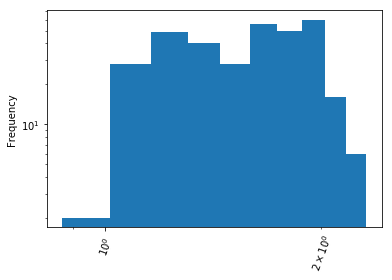

In [46]:
NE['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

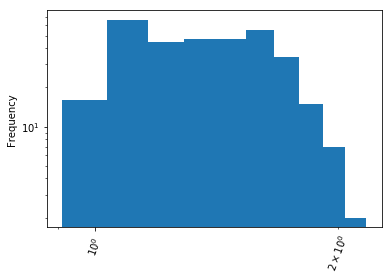

In [47]:
MS['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

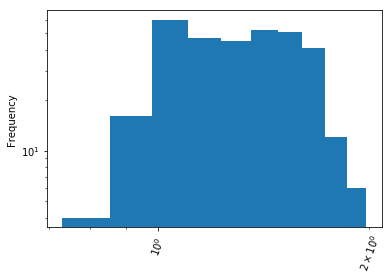

In [48]:
GL['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

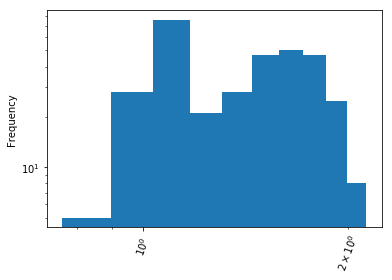

In [49]:
P['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

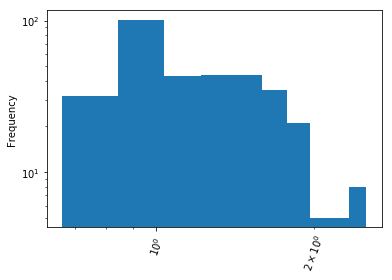

In [50]:
W['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

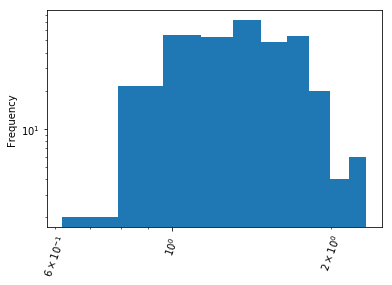

In [51]:
SE['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

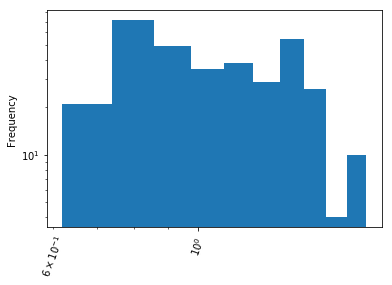

In [52]:
SC['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

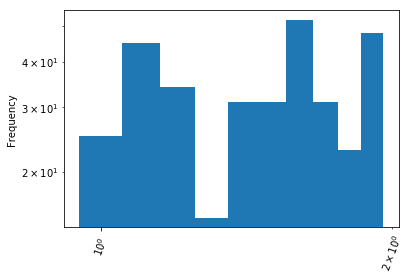

In [53]:
NNE['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

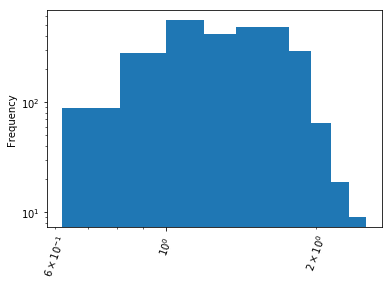

In [54]:
df['AveragePrice'].plot(kind='hist', rot=70, logx=True, logy=True)
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

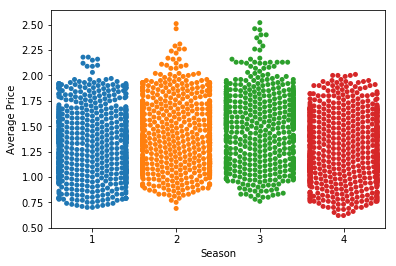

In [55]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=df)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

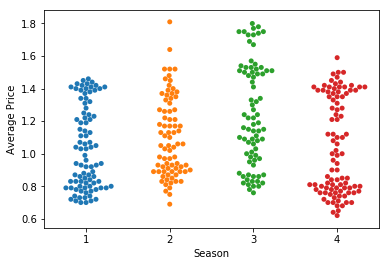

In [56]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=SC)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

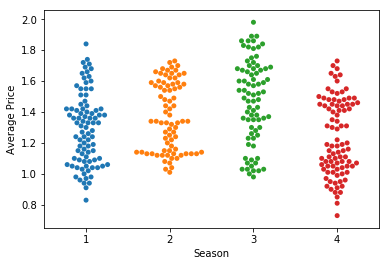

In [57]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=GL)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

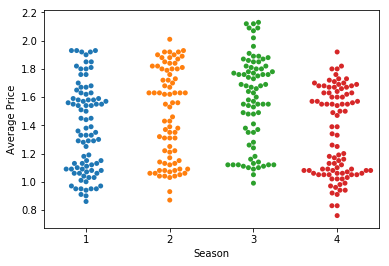

In [58]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=P)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

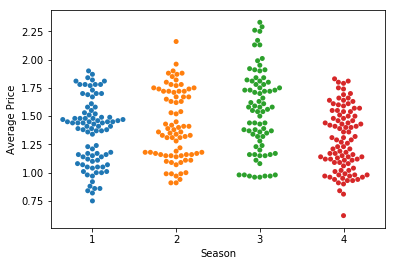

In [59]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=SE)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

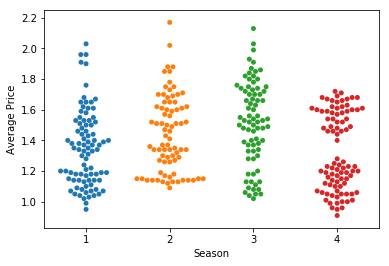

In [60]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=MS)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

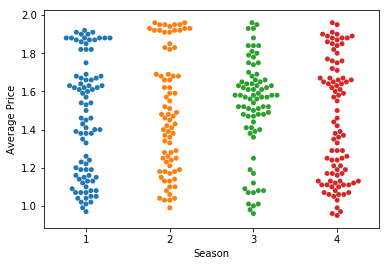

In [61]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=NNE)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

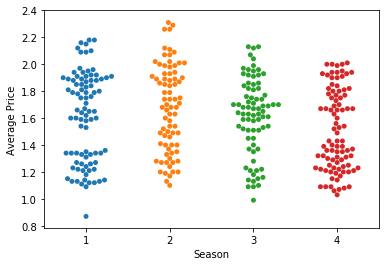

In [62]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=NE)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

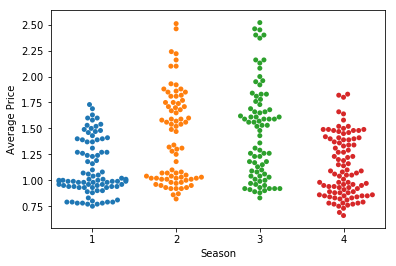

In [63]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Season#', y='AveragePrice', data=W)

# Label the axes
_ = plt.xlabel('Season')
_ = plt.ylabel('Average Price')

# Show the plot
plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500,2500,1053,500]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

In [ ]:
pricemap = {}
regions = set (df['region'].values)
seasons = set (df['Season'].values)
for region in regions: 
    for season in seasons: 
        prediction = df[(df['region'] == region) & (df['Season'] == season)].mean()['AveragePrice'] 
        print(region, season)
        print(prediction)